In [3]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.read_csv("lin_data.csv", usecols=["Temperature (C)", "Humidity"]).values
data
np.set_printoptions(threshold=30)

In [6]:
labels = data[:200,1].reshape(200,1)
data = data[:200,:2]
data = np.c_[data, np.ones(200)]
data.shape

(200, 3)

In [5]:
labels, data

(array([[0.89],
        [0.86],
        [0.89],
        ...,
        [0.87],
        [0.89],
        [0.86]]),
 array([[ 9.47222222,  0.89      ,  1.        ],
        [ 9.35555556,  0.86      ,  1.        ],
        [ 9.37777778,  0.89      ,  1.        ],
        ...,
        [10.58888889,  0.87      ,  1.        ],
        [ 9.98333333,  0.89      ,  1.        ],
        [11.02222222,  0.86      ,  1.        ]]))

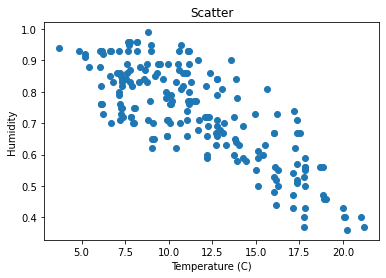

In [8]:
 def plot():
    plt.scatter(data[:,0],data[:,1])
    plt.xlabel("Temperature (C)"), plt.ylabel("Humidity"), plt.title("Scatter")
    plt.show()
plot()

In [78]:
weights = np.array([
    [.5],
    [.5],
    [1]
    ])
lr = 0.0001
iters = 500

In [42]:
def predict(data, weights):
    return np.dot(data,weights)

In [62]:
def cost_function(predictions, labels):
    
    datapoints = len(labels)
    cost = 0.5 * (predictions-labels)**2
    cost = cost.sum()
    cost /= datapoints
    
    return cost


In [96]:
def update_weights(data, weights, labels, lr):
    datapoints = len(labels)
    
    predictions = predict(data, weights)
    error = labels - predictions
    
    gradient = np.dot(data.T, error)
    gradient /= datapoints
    gradient *= lr
    
    weights += gradient
    return weights

In [99]:
def train(data, weights, labels, lr, iters):
    cost_history = []
    
    for i in range(iters):
        predictions = predict(data, weights)
        update_weights(data, weights, labels, lr)
        
        if i % 100 == 0:
            cost = cost_function(predictions, labels)
            cost_history.append(cost)
            
            print("iter={} cost={:.4f} weights={}".format(i, cost, weights))
    
    
    return cost_history, weights

In [104]:
cost_history, weights = train(data, weights, labels, lr, iters)

iter=0 cost=0.0079 weights=[[-0.0432626 ]
 [ 0.45195638]
 [ 0.93804943]]
iter=100 cost=0.0079 weights=[[-0.04321475]
 [ 0.45160097]
 [ 0.93767511]]
iter=200 cost=0.0079 weights=[[-0.04316701]
 [ 0.45124646]
 [ 0.93730159]]
iter=300 cost=0.0078 weights=[[-0.04311938]
 [ 0.45089285]
 [ 0.93692888]]
iter=400 cost=0.0078 weights=[[-0.04307185]
 [ 0.45054012]
 [ 0.93655697]]


<function matplotlib.pyplot.show(*args, **kw)>

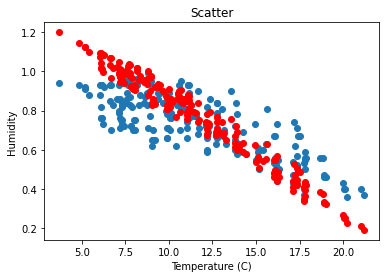

In [105]:
plot()
y = predict(data, weights)
plt.plot(data[:,0], y, "ro")
plt.show

In [1]:
data.shape

NameError: name 'data' is not defined